In [55]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

def Recall(y,p):
    return np.round(p).dot(y) / np.sum(y)

def Precison(y,p):
    return np.round(p).dot(y) / np.sum(np.round(p))

def F_score (y,p):
    return (2 * Recall(y,p) * Precison(y,p))/ (Recall(y,p) + Precison(y,p))
    

In [57]:
df = pd.read_csv("mushrooms.csv")

In [58]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
y = df["class"]
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [60]:
y = pd.get_dummies(y)
y.head()

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [61]:
x = df.drop(['class'], axis=1)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [62]:
x = pd.get_dummies(x)
x.shape

(8124, 117)

In [63]:
X = np.hstack((np.ones((x.shape[0],1)), x))
X

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [64]:
y_e = y['e'].values
y_p = y['p'].values
print (y_e)
print (y_p)

[0 1 1 ... 1 0 1]
[1 0 0 ... 0 1 0]


C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


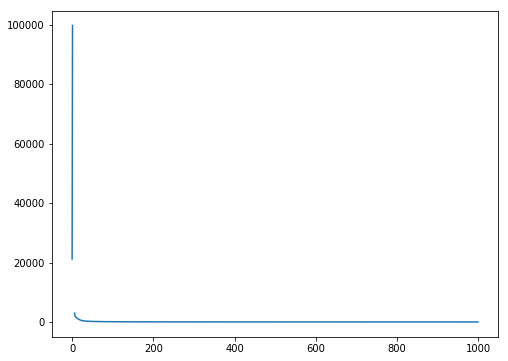

In [65]:
w = np.random.randn(X.shape[1])

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p = sigmoid(X.dot(w))
    J.append(cross_entropy(y_e, p))
    w -= eta*X.T.dot(p - y_e)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [66]:
print("Accuracy: {}".format(accuracy(y_e, p)))

Accuracy: 1.0


In [67]:
df = pd.read_csv("mushrooms.csv")

df = pd.get_dummies(df)
df = df.sample(frac=1)

df.drop(['class_p'], axis = 1,inplace = True)
df.head()


,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5635,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1351,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
575,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1649,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
6780,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [68]:
Train = int(df.shape[0] * 0.6)
Validate = int(df.shape[0] * 0.2)
Test = int(df.shape[0] - Train - Validate)

Train_Model =  df[:Train:]
Validate_Model = df[Train:Validate + Train:]
Test_Model = df[Validate + Train::]

D_Train = Train_Model.drop("class_e",axis='columns')


y1 = Train_Model.class_e
x1 = D_Train

#print(x1.min())
#print(x1.max())
#x1 = (x1 - x1.min()) / (x1.max() - x1.min())
X1 = np.vstack([np.array([1]*(x1.shape[0])), x1.T]).T

#D_Validate = pd.get_dummies(Validate_Model)
#D_Validate.drop("Purchase",axis='columns',inplace=True)

D_Validate = Validate_Model.drop("class_e",axis='columns')

y2 = Validate_Model.class_e
x2 = D_Validate

#x2 = (x2 - x2.min()) / (x2.max() - x2.min())
X2 = np.vstack([np.array([1]*(x2.shape[0])), x2.T]).T


#D_Test = pd.get_dummies(Test_Model)
#D_Test.drop("Purchase",axis='columns',inplace=True)

D_Test = Test_Model.drop("class_e",axis='columns')

y3 = Test_Model.class_e
x3 = D_Test

#x3 = (x3 - x3.min()) / (x3.max() - x3.min())
X3 = np.vstack([np.array([1]*(x3.shape[0])), x3.T]).T

In [69]:
X1.shape

(4874, 118)

In [70]:
w_train = np.random.randn(X1.shape[1])
p_train = sigmoid(X1.dot(w_train))


np.isnan(X1).any()



False

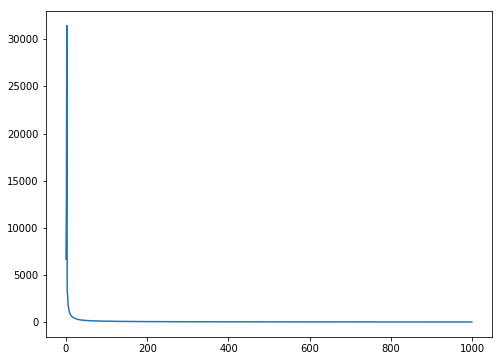

In [71]:
w_train = np.random.randn(X1.shape[1])

J_train = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p_train = sigmoid(X1.dot(w_train))
    J_train.append(cross_entropy(y1, p_train))
    w_train -= eta*X1.T.dot(p_train - y1)
    
    
plt.figure(figsize = (8,6))
plt.plot(J_train)



In [72]:
print("Accuracy: {}".format(accuracy(y1, p_train)))

Accuracy: 1.0


In [73]:
p_v = sigmoid(X2.dot(w_train))
print("Accuracy: {}".format(accuracy(y2, p_v)))

Accuracy: 1.0


In [74]:
p_t = sigmoid(X3.dot(w_train))
print("Accuracy: {}".format(accuracy(y3, p_t)))

Accuracy: 1.0


In [75]:
print("F Score of Precison: {}".format(Precison(y3,p_t)))

F Score of Precison: 0.9971195028682857


In [76]:
print("F Score of Recall: {}".format(Recall(y3,p_t)))

F Score of Recall: 0.9982575813794126


In [80]:
print("F Score of test: {}".format(F_score(y3,p_t)))
print("F Score of valadation: {}".format(F_score(y2,p_v)))  
print("F Score of train: {}".format(F_score(y1,p_train)))

F Score of test: 1.0
F Score of valadation: 1.0
F Score of train: 1.0


In [22]:
# ROC / AUC
roc_matrix = np.column_stack((p_t,np.round(p_t), y3))

roc_matrix = roc_matrix[roc_matrix[:,0].argsort()[::-1],:]
tp = np.cumsum((roc_matrix[:,1]==1) & (roc_matrix[:,2] ==1))/np.sum(roc_matrix[:,2] == 1)
fp = np.cumsum((roc_matrix[:,1]==1) & (roc_matrix[:,2] ==0))/np.sum(roc_matrix[:,2] == 0)

tp = np.array([0] + tp.tolist() + [1])
fp = np.array([0] + fp.tolist() + [1])

roc_matrix[:2,]

array([[1.        , 1.        , 1.        ],
       [0.99999999, 1.        , 1.        ]])

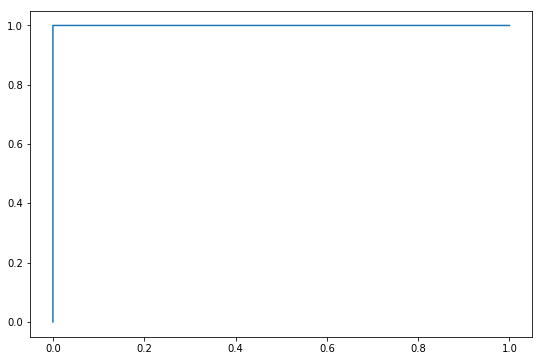

In [23]:
plt.figure(figsize= (9,6))
plt.step(fp,tp)

In [24]:
auc = tp[1:].dot(np.diff(fp))

auc

1.0

Check for best L1 and L2

In [195]:
#w_l2 = np.random.randn(X2.shape[1])
w_train = np.random.randn(X1.shape[1])

#l2 = 100

J =[]

eta = 1e-3
epochs = int(1e3)

start = time.time()
for l2 in range (0,5):
    for l1 in range (0,5):
        for t in range(epochs):
            p_train = sigmoid(X1.dot(w_train))
            w_train -= eta*(X1.T.dot(p_train - y1) + l2*w_train + l1*np.sign(w_train))

        p_v = sigmoid(X2.dot(w_train))
        J.append((cross_entropy(y2, p_v),l1,l2))
        
end = time.time()

print (end - start)

153.59609007835388


In [196]:
J

[(4.2720120659482825, 0, 0),
 (6.267486046575769, 1, 0),
 (10.673618032433966, 2, 0),
 (14.175349347896633, 3, 0),
 (16.80148834925127, 4, 0),
 (10.804421277434205, 0, 1),
 (15.267883863379023, 1, 1),
 (19.159666120905797, 2, 1),
 (22.772399343039773, 3, 1),
 (26.220019250748834, 4, 1),
 (18.065135774366173, 0, 2),
 (22.190586086240245, 1, 2),
 (26.051618030470117, 2, 2),
 (29.72341983604548, 3, 2),
 (33.07456002131751, 4, 2),
 (23.844699619265644, 0, 3),
 (27.803555257415997, 1, 3),
 (31.720882279023222, 2, 3),
 (35.472088845796094, 3, 3),
 (38.967732075132545, 4, 3),
 (28.827650462347787, 0, 4),
 (32.68047824744464, 1, 4),
 (36.66532131402275, 2, 4),
 (40.395954615135, 3, 4),
 (44.00619280706937, 4, 4)]

In [154]:
print("Best L1: {}".format(min(J)[1]))
print("Best L2: {}".format(min(J)[2]))

Best L1: 0
Best L2: 0


In [167]:
w_l2 = np.random.randn(X1.shape[1])

l2 = 100

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p_l2 = sigmoid(X1.dot(w_l2))
    J.append(cross_entropy(y1,p_l2) + l2*w_l2.dot(w_l2))
    w_l2 -= eta*(X1.T.dot(p_l2 - y1) + l2*w_l2)
    
p_l2_v = sigmoid(X2.dot(w_l2))

In [168]:
print("Accuracy: {}".format(accuracy(y2, p_l2_v)))

Accuracy: 0.9359605911330049


In [169]:
print("Accuracy: {}".format(accuracy(y1, p_l2)))

Accuracy: 0.9749692244562987


In [171]:
p_l2_t = sigmoid(X3.dot(w_l2))
print("Accuracy: {}".format(accuracy(y3, p_l2_t)))

Accuracy: 0.923739237392374


In [172]:
print("F Score of test: {}".format(F_score(y3,p_l2_t)))
print("F Score of valadation: {}".format(F_score(y2,p_l2_v)))  
print("F Score of train: {}".format(F_score(y1,p_l2)))

F Score of test: 0.9118364046859042
F Score of valadation: 0.9238685399857985
F Score of train: 0.9254666011584246


In [28]:
df = pd.read_csv("mushrooms.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number